In [1]:
import librosa
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import soundfile as sf
import numpy as np

In [2]:
f0 = 130.82
fd = 16000
note_duration = 3 # sec
note_delay_size = int(0.1 * fd)

In [3]:
def generate(algo, N):
    if algo == "normal":
        return np.random.normal(0, 1, N)
    elif algo == "uniform":
        return np.random.uniform(-1, 1, N)

In [4]:
def karplus_strong(fd, fs, algo, attenuation, alpha):
    N = int(fd / fs - 1/2)
    note_size = fd * note_duration
    
    y = np.zeros(note_size)
    y[-1] = 0
    
    y[0:N] = generate(algo, N)
    for n in range(N, note_size):
        if alpha is None:
            y[n] = attenuation * 0.5 * (y[n - N] + y[n - N - 1])
        else:
            y[n] = attenuation * 0.5 * ((1 - alpha) * y[n - N] + alpha * y[n - N - 1])

    return y

In [5]:
def get_chord(fd, f0, notes, algo, attenuation, alpha):
    note_size = fd * note_duration
    chord_size = int((notes.size - 1) * note_delay_size + note_size)
    chord = np.zeros((notes.size, chord_size))

    for i in range(notes.size):
        fk = f0 * 2 ** (notes[i] / 12)
        chord[
            i, 
            i * note_delay_size : chord_size - (notes.size - 1 - i) *  note_delay_size
        ] = karplus_strong(fd, fk, algo, attenuation, alpha)[-note_size:]
                

    return chord

## Аккорды с разными методами случайной генерации

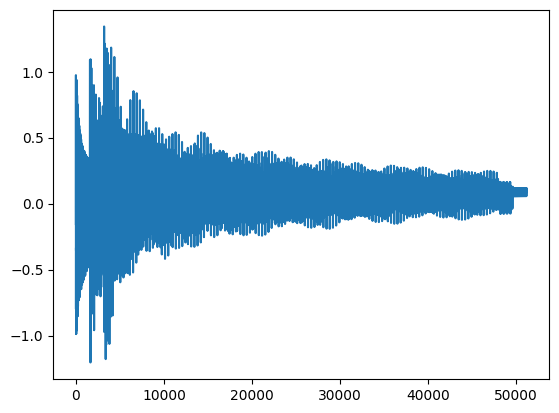

In [14]:
chord = get_chord(fd, f0, np.array([5, 9, 12]), "uniform", 1, None)
sound = np.sum(chord, axis=0)
sf.write('chord-default-uniform.wav', sound, fd)

plt.plot(sound)

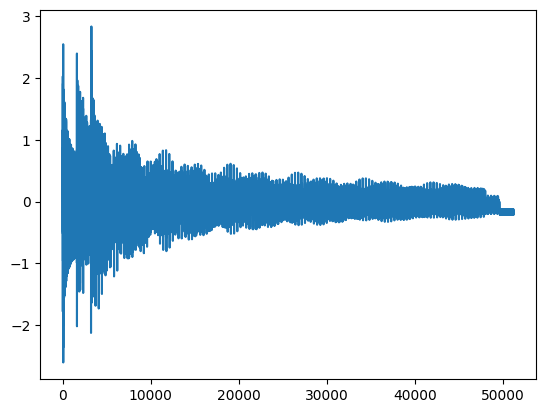

In [15]:
chord = get_chord(fd, f0, np.array([5, 9, 12]), "normal", 1, None)
sound = np.sum(chord, axis=0)
sf.write('chord-default-normal.wav', sound, fd)

plt.plot(sound)

### Вывод

Равномерное распределение дает более качественное звучание, чем нормальное

## Аккорды с разным коээфициентом затухания

In [8]:
chord = get_chord(fd, f0, np.array([7, 4, 1]), "uniform", 1, None)
sound = np.sum(chord, axis=0)
sf.write('chord-attenuation-1.wav', sound, fd)

plt.plot(sound)

In [9]:
chord = get_chord(fd, f0, np.array([7, 4, 1]), "uniform", 0.9, None)
sound = np.sum(chord, axis=0)
sf.write('chord-attenuation-0.9.wav', sound, fd)

plt.plot(sound)

In [10]:
chord = get_chord(fd, f0, np.array([7, 4, 1]), "uniform", 0.8, None)
sound = np.sum(chord, axis=0)
sf.write('chord-attenuation-0.8.wav', sound, fd)

plt.plot(sound)

## Аккорды с разным коээфициентом alpha¶

In [11]:
chord = get_chord(fd, f0, np.array([8, 11, 15]), "uniform", 1, 0.01)
sound = np.sum(chord, axis=0)
sf.write('chord-alpha-0.01.wav', sound, fd)

plt.plot(sound)

In [12]:
chord = get_chord(fd, f0, np.array([8, 11, 15]), "uniform", 1, 0.423)
sound = np.sum(chord, axis=0)
sf.write('chord-alpha-0.423.wav', sound, fd)

plt.plot(sound)

In [13]:
chord = get_chord(fd, f0, np.array([8, 11, 15]), "uniform", 1, 0.99)
sound = np.sum(chord, axis=0)
sf.write('chord-alpha-0.99.wav', sound, fd)

plt.plot(sound)

# Сэмплы

Ссылка на сэмплы: https://disk.yandex.ru/d/ejTed8xteCf09Q